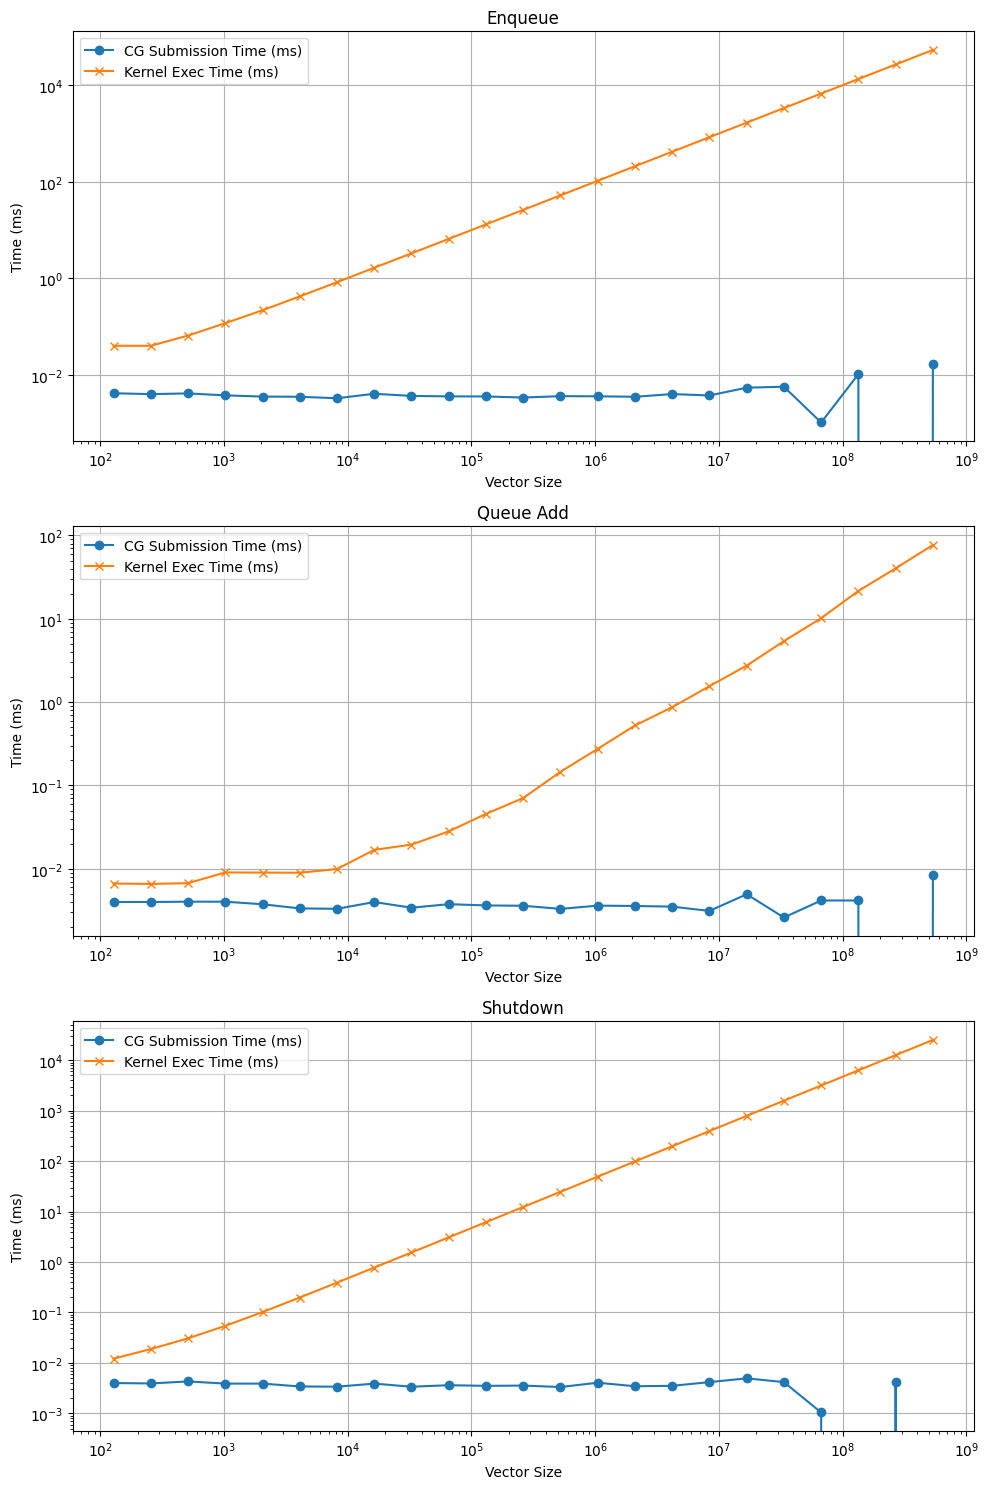

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

events = df_q["Event"].unique()
for i, event in enumerate(events):
    subset = df_q[df_q["Event"] == event]
    axes[i].plot(subset["VecSize"], subset["MeanCGSubmissionTime(ms)"], label="CG Submission Time (ms)", marker='o')
    axes[i].plot(subset["VecSize"], subset["MeanKernelExecTime(ms)"], label="Kernel Exec Time (ms)", marker='x')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_title(event)
    axes[i].set_xlabel("Vector Size")
    axes[i].set_ylabel("Time (ms)")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

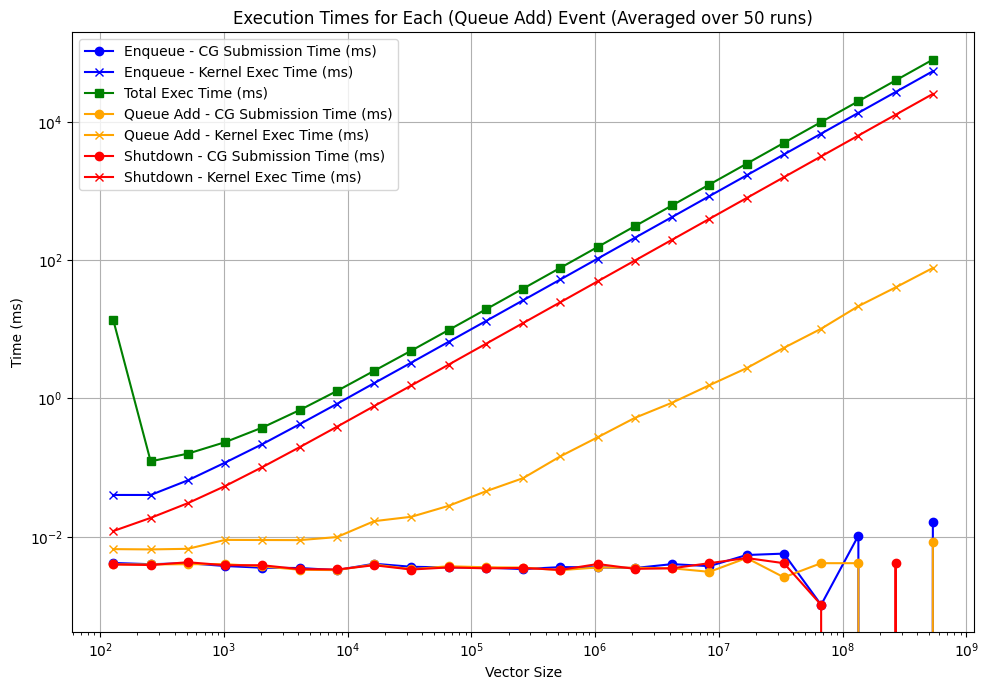

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['blue', 'orange', 'red']  # Different colors for different events
markers = ['o', 'x', 's']  # Different markers for CG Submission, Kernel Exec, and Total Exec

for i, event in enumerate(events):
    subset = df_q[df_q["Event"] == event]
    ax.plot(subset["VecSize"], subset["MeanCGSubmissionTime(ms)"], label=f"{event} - CG Submission Time (ms)", color=colors[i], marker='o')
    ax.plot(subset["VecSize"], subset["MeanKernelExecTime(ms)"], label=f"{event} - Kernel Exec Time (ms)", color=colors[i], marker='x')
    if i == 0:  # Plot total execution time once
        ax.plot(subset["VecSize"], subset["MeanTotalExecTime(ms)"], label="Total Exec Time (ms)", color='green', marker='s')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Execution Times for Each (Queue Add) Event (Averaged over 50 runs)")
ax.set_xlabel("Vector Size")
ax.set_ylabel("Time (ms)")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


**Basic Add Without Timing Memory Management**

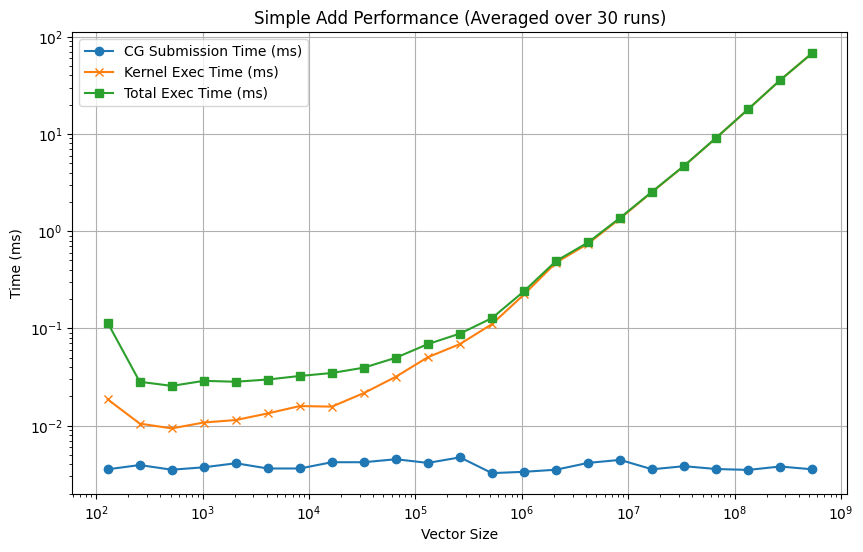

In [5]:
df_simple_add = pd.read_csv("profiling_va_usm.csv")

# Plot for Single Scalar Add


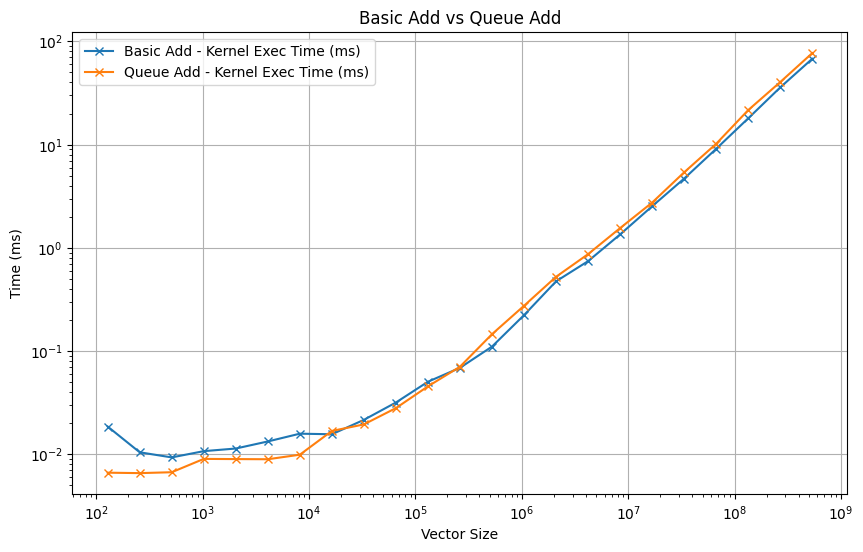

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(df_simple_add["VecSize"], df_simple_add["MeanKernelExecTime(ms)"], label="Basic Add - Kernel Exec Time (ms)", marker='x')
event = "Queue Add"
subset = df_q[df_q["Event"] == event]
plt.plot(subset["VecSize"], subset["MeanKernelExecTime(ms)"], label=f"{event} - Kernel Exec Time (ms)", marker='x')

plt.xscale('log')
plt.yscale('log')
plt.title("Basic Add vs Queue Add")
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend()

plt.show()

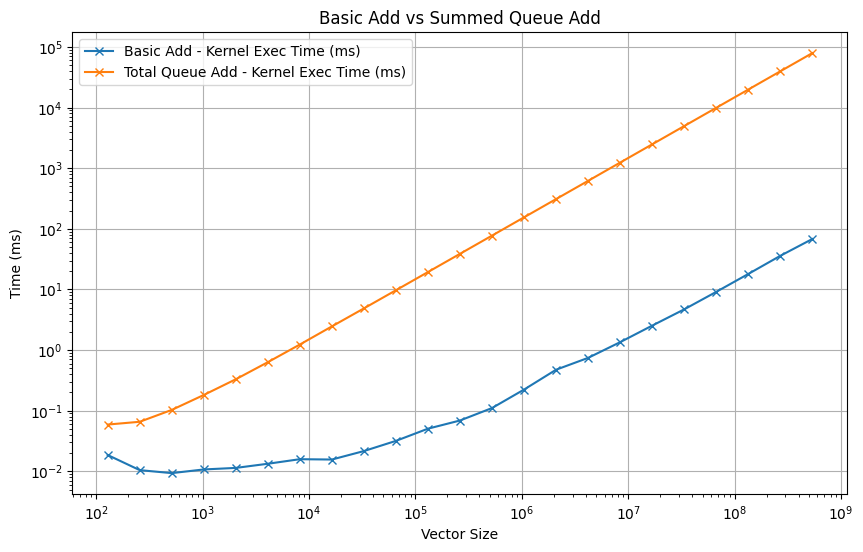

In [11]:
# Sum the KernelExecTime(ms) for each VectorSize across all events
aggregated = df_q.groupby("VecSize")["MeanKernelExecTime(ms)"].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_simple_add["VecSize"], df_simple_add["MeanKernelExecTime(ms)"], label="Basic Add - Kernel Exec Time (ms)", marker='x')

# Plot the aggregated Kernel Exec Time for each vector size
plt.plot(aggregated["VecSize"], aggregated["MeanKernelExecTime(ms)"], label="Total Queue Add - Kernel Exec Time (ms)", marker='x')

plt.xscale('log')
plt.yscale('log')
plt.title("Basic Add vs Summed Queue Add")
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend()

plt.show()

In [12]:
df_gmq = pd.read_csv("profiling_global_multi_queue.csv")

**Load and Setup**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

basic_add = pd.read_csv("profiling_va_usm.csv")
multiq_add = pd.read_csv("profiling_global_multi_queue.csv")
skmq_add = pd.read_csv("profiling_sk_global_multi_queue.csv")

**Basic vector addition using USM**

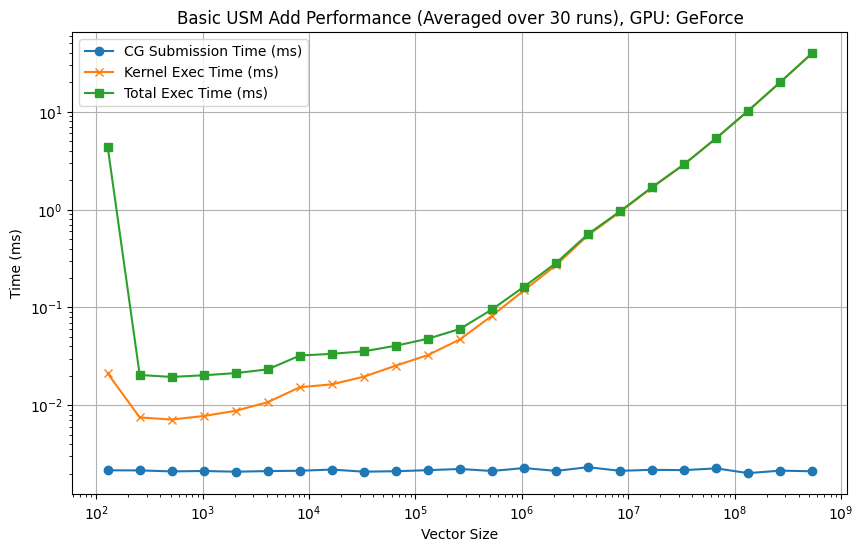

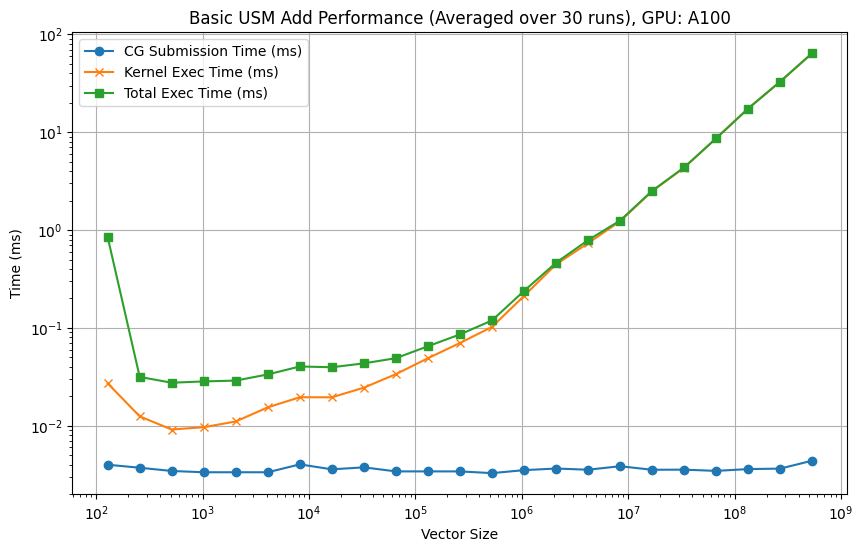

In [7]:

gpus = basic_add['GPU'].unique()

for gpu in gpus:
    gpu_df = basic_add[(basic_add["GPU"] == gpu)]
    plt.figure(figsize=(10, 6))

    plt.plot(gpu_df["VecSize"], gpu_df["MeanCGSubmissionTime(ms)"], label="CG Submission Time (ms)", marker='o')
    plt.plot(gpu_df["VecSize"], gpu_df["MeanKernelExecTime(ms)"], label="Kernel Exec Time (ms)", marker='x')
    plt.plot(gpu_df["VecSize"], gpu_df["MeanTotalExecTime(ms)"], label="Total Exec Time (ms)", marker='s')

    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Basic USM Add Performance (Averaged over 30 runs), GPU: {gpu}")
    plt.xlabel("Vector Size")
    plt.ylabel("Time (ms)")
    plt.grid(True)
    plt.legend()

    plt.show()

**Single global queue vector addition**

**Multiple global queues vector addition**

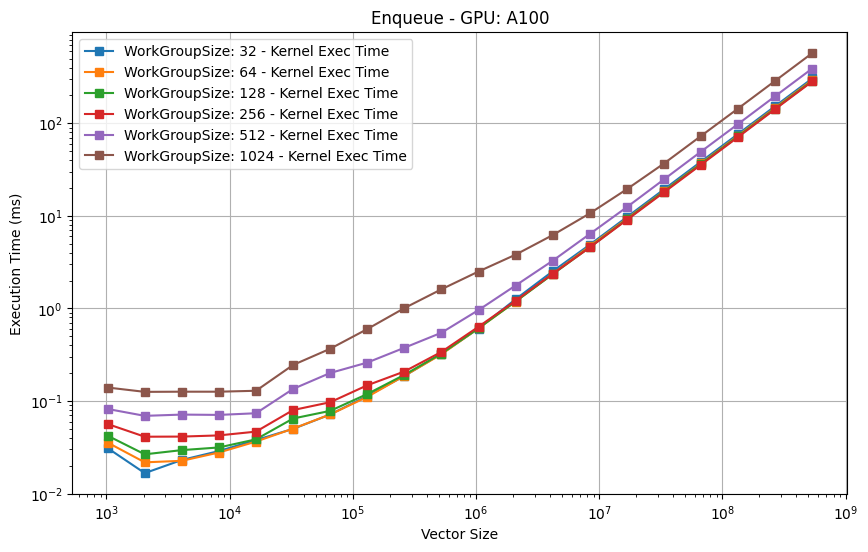

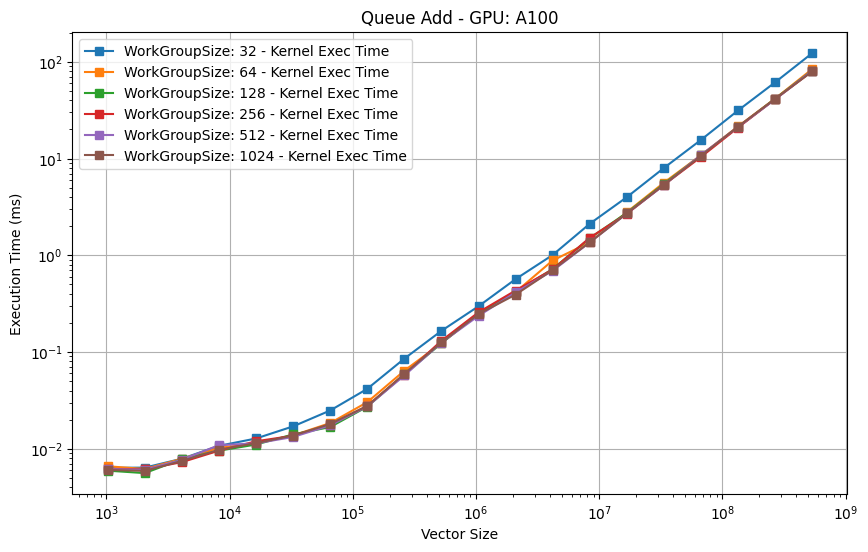

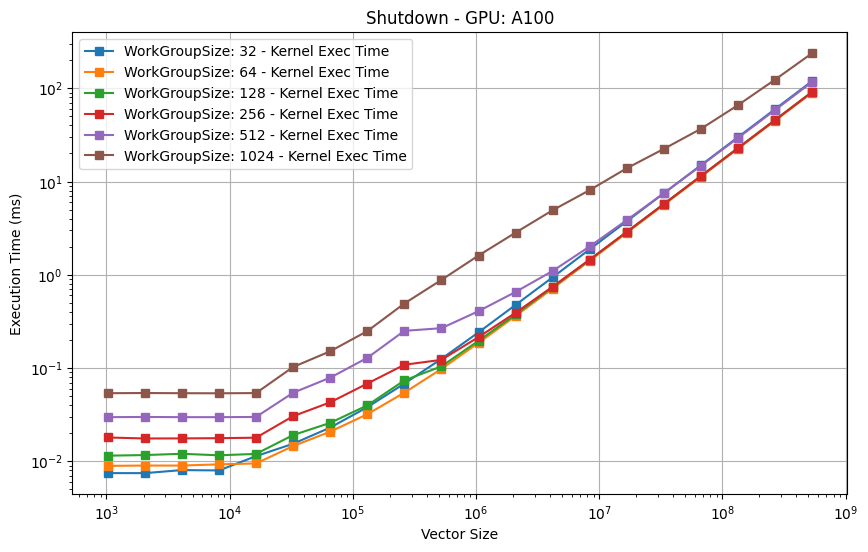

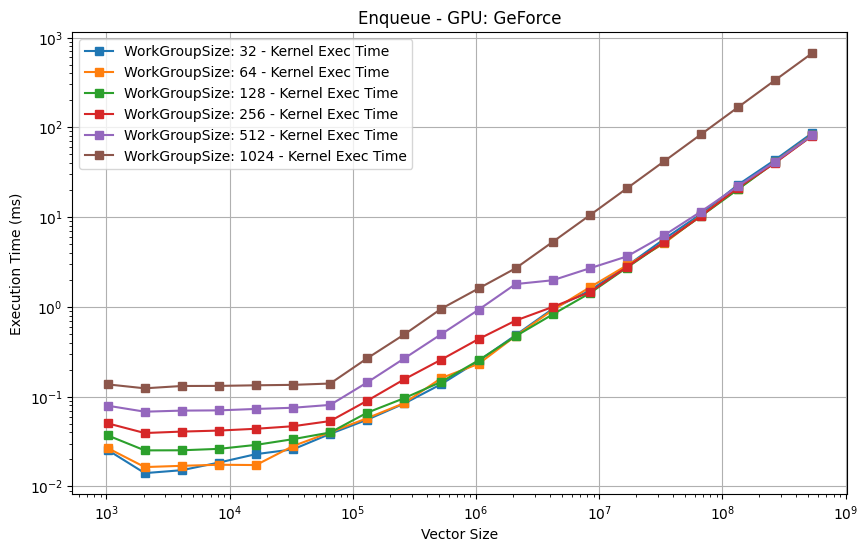

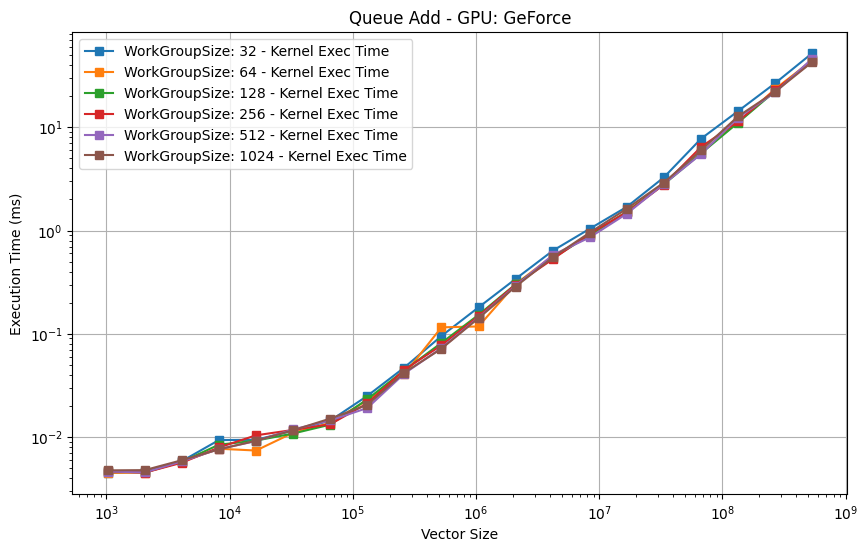

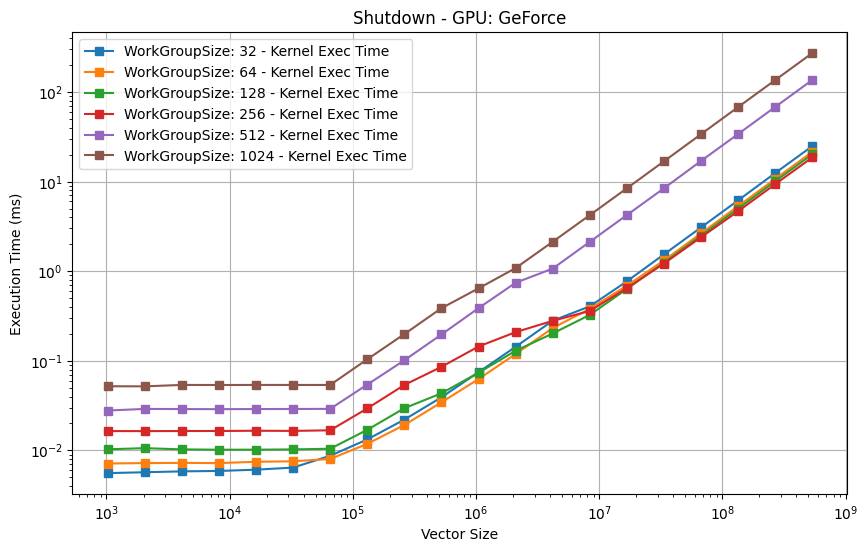

In [12]:
# SPLIT PLOTS
gpus = multiq_add['GPU'].unique()
events = multiq_add['Event'].unique()

# Loop over each GPU and Event to create separate plots
for gpu in gpus:
    for event in events:
        # Filter the DataFrame for the current GPU and Event
        gpu_event_df = multiq_add[(multiq_add['GPU'] == gpu) & (multiq_add['Event'] == event)]
        
        # Get the unique WorkGroupSizes for the current GPU and Event
        work_group_sizes = gpu_event_df['WorkGroupSize'].unique()
        
        plt.figure(figsize=(10, 6))
        
        # Plot data for each WorkGroupSize
        for work_group_size in work_group_sizes:
            subset_df = gpu_event_df[gpu_event_df['WorkGroupSize'] == work_group_size]
            
            # Concatenate label with WorkGroupSize for distinction
            label_base = f'WorkGroupSize: {work_group_size}'
            
            # plt.plot(subset_df['VecSize'], subset_df['MeanCGSubmissionTime(ms)'], '-o', label=f'{label_base} - CG Submission Time')
            plt.plot(subset_df['VecSize'], subset_df['MeanKernelExecTime(ms)'], '-s', label=f'{label_base} - Kernel Exec Time')
            # plt.plot(subset_df['VecSize'], subset_df['MeanTotalExecTime(ms)'], '-^', label=f'{label_base} - Total Exec Time')
        
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f'{event} - GPU: {gpu}')
        plt.xlabel('Vector Size')
        plt.ylabel('Execution Time (ms)')
        plt.grid(True)
        plt.legend()
        plt.show()

**Single Kernel Multiple global queues vector addition**

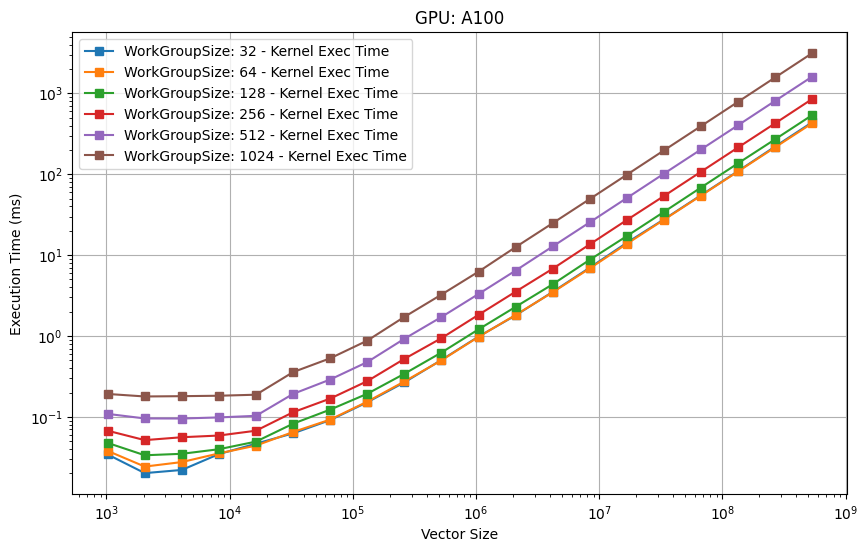

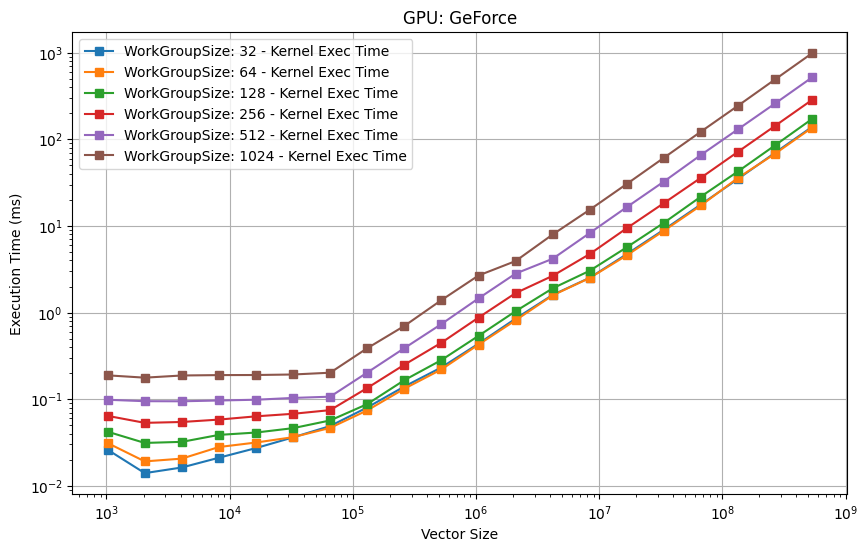

In [4]:
gpus = multiq_add['GPU'].unique()

# Loop over each GPU and Event to create separate plots
for gpu in gpus:
    gpu_df = skmq_add[(skmq_add["GPU"] == gpu)]
    work_group_sizes = gpu_df["WorkGroupSize"].unique()
    plt.figure(figsize=(10, 6))

    for work_group_size in work_group_sizes:
        subset_df = gpu_df[gpu_df['WorkGroupSize'] == work_group_size]
        
        # Concatenate label with WorkGroupSize for distinction
        label_base = f'WorkGroupSize: {work_group_size}'
        
        # plt.plot(subset_df['VecSize'], subset_df['MeanCGSubmissionTime(ms)'], '-o', label=f'{label_base} - CG Submission Time')
        plt.plot(subset_df['VecSize'], subset_df['MeanKernelExecTime(ms)'], '-s', label=f'{label_base} - Kernel Exec Time')
        # plt.plot(subset_df['VecSize'], subset_df['MeanTotalExecTime(ms)'], '-^', label=f'{label_base} - Total Exec Time')
        
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'GPU: {gpu}')
    plt.xlabel('Vector Size')
    plt.ylabel('Execution Time (ms)')
    plt.grid(True)
    plt.legend()
    plt.show()


**Comparisons**

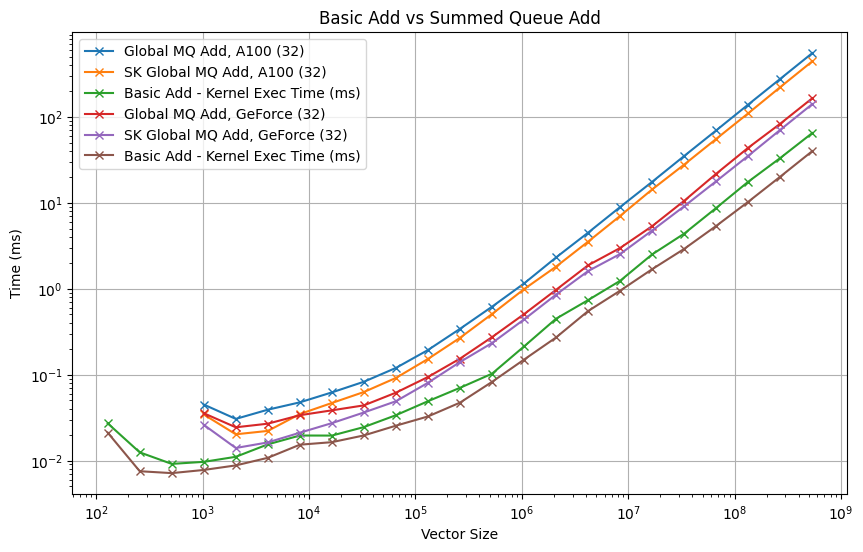

In [8]:
# Total execution times (summed if 3 kernels) across GPUs

gmq32 = multiq_add[multiq_add['WorkGroupSize'] == 32]
gmq32 = gmq32.groupby(['GPU', 'VecSize'])['MeanKernelExecTime(ms)'].sum().reset_index()

skmq32 = skmq_add[skmq_add['WorkGroupSize'] == 32]
skmq32 = skmq32.groupby(['GPU', 'VecSize'])['MeanKernelExecTime(ms)'].sum().reset_index()

plt.figure(figsize=(10, 6))


for gpu in gmq32['GPU'].unique():
    gpu_data = gmq32[gmq32['GPU'] == gpu]
    sk_gpu_data = skmq32[skmq32['GPU'] == gpu]
    ba_gpu_data = basic_add[basic_add['GPU'] == gpu]
    plt.plot(gpu_data['VecSize'], gpu_data['MeanKernelExecTime(ms)'], label=f'Global MQ Add, {gpu} (32)', marker='x')
    plt.plot(sk_gpu_data['VecSize'], sk_gpu_data['MeanKernelExecTime(ms)'], label=f'SK Global MQ Add, {gpu} (32)', marker='x')
    plt.plot(ba_gpu_data["VecSize"], ba_gpu_data["MeanKernelExecTime(ms)"], label=f"Basic Add - Kernel Exec Time (ms), {gpu}", marker='x')


plt.xscale('log')
plt.yscale('log')
plt.title("Basic Add vs Summed Queue Add")
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend()

plt.show()